# Notebook proyecto final
## Diego Isaac Hurtado
### Modelo para calcular el costo de un seguro médico basado en caracteristicas de las personas. 
#### Descripción del Problema
¿Cómo podemos calcular el costo de un seguro médico basándonos en variables como la región, sexo, índice de masa corporal (IMC), número de hijos, hábito de fumar y edad? El siguiente análisis se centrará en identificar cuáles de estas variables tienen mayor influencia en el incremento del costo del seguro. El objetivo es desarrollar un modelo predictivo que no solo estime los costos de manera eficiente, sino que también determine los factores clave que contribuyen al aumento de estos costos.

En este repositorio se llevará a cabo un análisis para identificar las variables más relevantes que afectan el costo del seguro médico. El objetivo es desarrollar un modelo de regresión lineal que permita calcular el costo del seguro médico en función de características específicas del asegurado. Este modelo facilitará estimaciones precisas y ayudará a comprender mejor cómo diferentes factores contribuyen al costo final del seguro.


### Importamos las librerias necesarias 

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


### Dataset para trabajar

In [50]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Limpieza de datos

In [51]:
data.drop_duplicates(inplace=True) #Eliminamos las filas duplicadas

In [52]:
data.dropna(inplace=True) #Eliminamos las filas con elementos nulos

### Análisis Exploratorio de Datos (EDA)

#### Descripción general del dataset

In [53]:
data.describe() # Descripcion general de los datos

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Con este histograma podemos ver que la mayoría de personas de nuestro dataset se encuentran en una edad de aprox 20 años. 

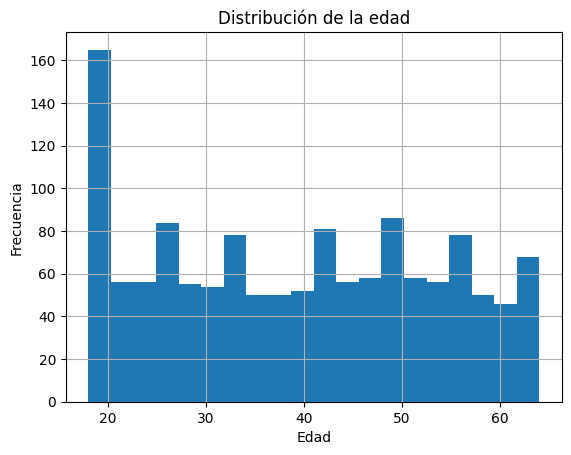

In [54]:
data["age"].hist(bins=20)
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.savefig('distribucion_edad.png') 
plt.show()

#### Al echar un vistazo en el BMI por región, vemos que el sur es donde tenemos mas personas con ibm muy altos

<Figure size 1000x600 with 0 Axes>

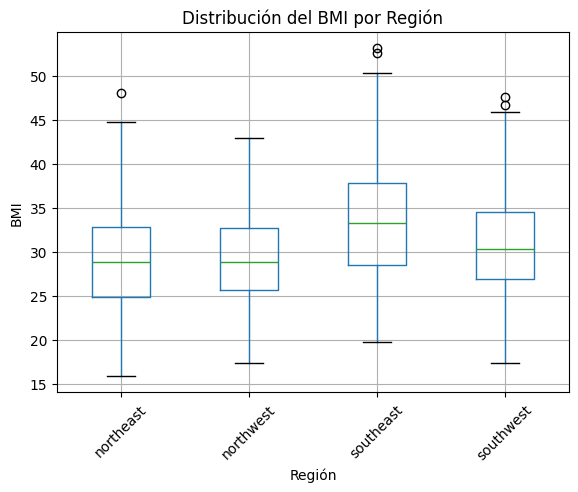

In [55]:
plt.figure(figsize=(10, 6))
data.boxplot(column='bmi', by='region')
plt.title('Distribución del BMI por Región')
plt.xlabel('Región')
plt.ylabel('BMI')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.suptitle('')  # Suprime el título automático para 'by='
plt.savefig('distribucion_bmi_region.png') 
plt.show()

### Ahora analicemos algunas de las variables categóricas

#### En la siguiente gráfica veremos la distribución de sexo en nuestra población y tambíen la de los fumadores

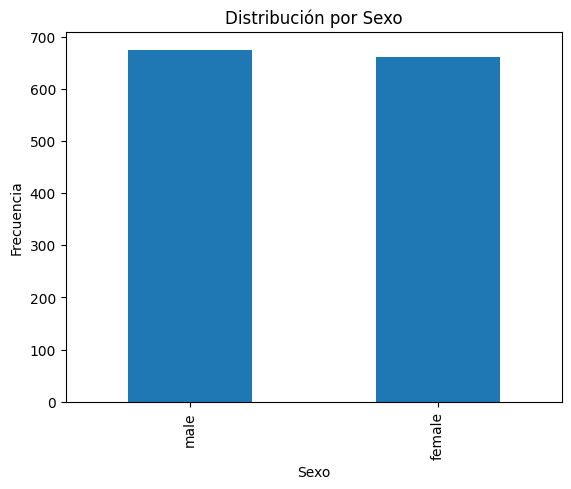

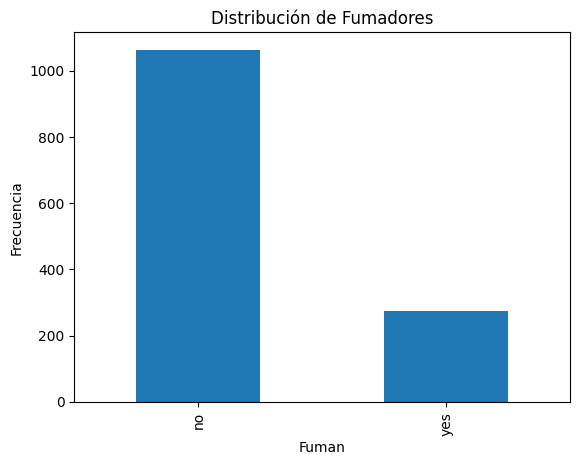

In [56]:
data['sex'].value_counts().plot(kind='bar')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.savefig('distribucion_sex.png') 
plt.show()

data['smoker'].value_counts().plot(kind='bar')
plt.title('Distribución de Fumadores')
plt.xlabel('Fuman')
plt.ylabel('Frecuencia')

plt.savefig('distribucion_smoke.png') 
plt.show()

#### Relaciones entre algunas variables

##### Gracias a este gráfico podemos intuir que fumar es una variable que incrementa el costo de un seguro

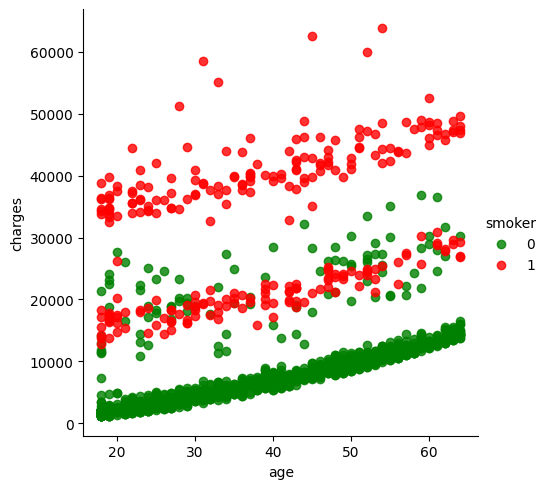

In [45]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = ['green', 'red'], fit_reg=False).figure.savefig('scatterplot_smoke.png')


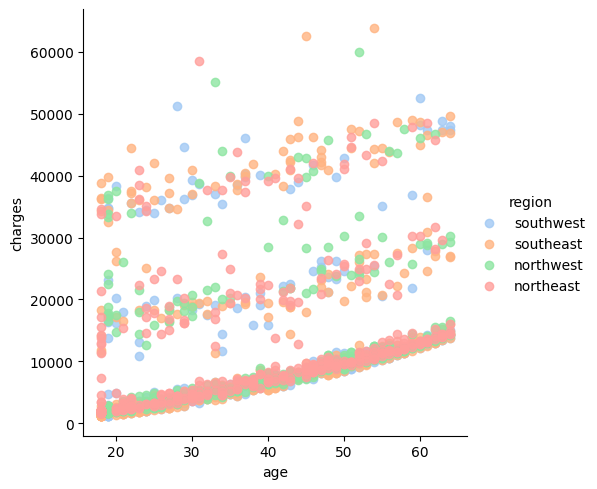

In [61]:
sns.lmplot(x="age", y="charges", hue="region", data=data, palette = 'pastel', fit_reg=False).figure.savefig('scatterplot_region.png')


### Encodearemos los datos categóricos correspondientes al sexo, fumador y región de las personas

In [18]:
df = data 
label_encoder = preprocessing.LabelEncoder() 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region']) 

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Con este heatmap de correlación, podemos observar la influencia de cada variable sobre el monto a pagar del seguro.
#### Observamos que la variable que tiene más relación con el costo del seguro es si la persona es fumadora o no. Esto se debe a que presenta una correlación cercana a 1, indicando una fuerte relación positiva con el aumento en el precio del seguro.

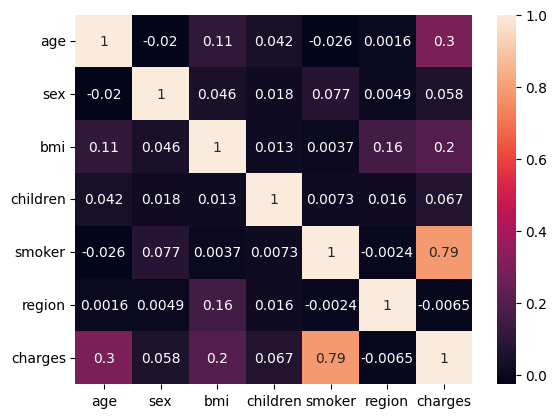

In [46]:
sns.heatmap(df.corr(), annot=True).figure.savefig('corr.png')

## Insights del análisis previo.
- La población del sur tiene un bmi mas elevado, pero parece no ser suficiente para subir el costo del seguro. 
- La matriz de correlación indica una fuerte relación entre fumar y el costo del seguro.


A continuación probaremos que una persona que fuma pagará mas por un seguro médico 

# Creación de un modelo de regresión. 


#### Primero dropeamos la variable a predecir, en este caso será el costo (charges) del seguro
#### Luego creamos los data sets de entrenamiento y testeo.

In [36]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
#El test size sirve para definir el tamaño de los datasets de entrenamiento y testeo.
#El valor del randomstate fue seleccionado tras hacer un ciclo for con 100 diferentes valores.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
#Creamos una instancia de un modelo de regresión lineal y usamos el método ajuste para crear nuesto modelo.
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#Evaluamos un modelo 
print(lr.score(x_test,y_test))


0.8068466322629111


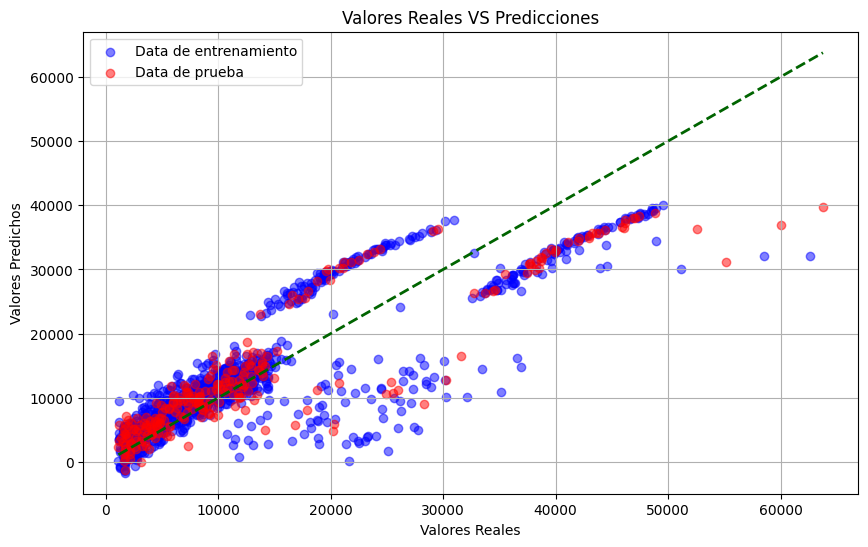

In [47]:
plt.figure(figsize=(10, 6))

# Ploteando datos de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Data de entrenamiento', alpha=0.5)

# Ploteando datos de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Data de prueba', alpha=0.5)

# Línea ideal
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='darkgreen', linestyle='--', linewidth=2)

plt.title('Valores Reales VS Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.show
plt.savefig('modelo_final.png')

Tras crear el modelo, lo evaluamos con el score R^2 obteniendo un valor de 0.80, lo cual indica un buen desempeño del modelo

## Testing del modelo
Probaremos el modelo con datos ficticios correspondientes a una persona para determinar cuánto aumenta el precio del seguro si la persona es fumadora.



In [84]:
data_diego = pd.DataFrame({
    'age': [35],
    'sex': [0],  # Supongamos 0 para femenino y 1 para masculino
    'bmi': [28.0],
    
    'children': [0],
    'smoker': [0],
    'region': [3]
    # Supongamos 0 para no fumador y 1 para fumador
})


from sklearn.preprocessing import StandardScaler


# Hacer la predicción con los datos escalados
prediccion = lr.predict(data_diego)
print("Predicción con datos escalados:", prediccion)


Predicción con datos escalados: [5699.233749]


In [85]:
data_diego_smoke = pd.DataFrame({
    'age': [35],
    'sex': [0],  # Supongamos 0 para femenino y 1 para masculino
    'bmi': [28.0],
    
    'children': [0],
    'smoker': [1],
    'region': [3]
    # Supongamos 0 para no fumador y 1 para fumador
})


from sklearn.preprocessing import StandardScaler


# Hacer la predicción con los datos escalados
prediccion = lr.predict(data_diego_smoke)
print("Predicción con datos escalados:", prediccion)

Predicción con datos escalados: [28751.38650072]


Resultados: El precio de un seguro médico incrementa hasta 5 veces para las personas fumadoras. 